Introduction

Data Loading
    

Preliminary Data Inspection
    

Data Cleaning


Exploratory Data Analysis for Feature Understanding

- Descriptive Statistics
- Univariate Analysis
- Correlation Analysis


Feature Selection
   
Preparing Data for Modeling
    
- Encoding Categorical Variables
- Feature Scaling
- Data Splitting


Model Building

- Creating a Validation Set  
- Testing Different Models
- Hyperparameter Tuning Using Cross-Validation
    

   

### Data Loading

Import necessary libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr
import os
import requests

df_trains = pd.read_csv('trains.csv')

### Preliminary Data Inspection

Using the function *.head()*, we can extract from the dataset the first x columns (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [2]:
df_trains.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


#### Showing the dimension of the dataset

In [3]:
print ('The shape of the given dataset is {}. It contains {} rows and {} columns '.format(df_trains.shape,df_trains.shape[0],df_trains.shape[1]))

The shape of the given dataset is (129880, 25). It contains 129880 rows and 25 columns 


The dataset has 129880 rows and 25 columns

#### Gathering information from data

The visulaization *.info()* let us notice that almost every column has complete informations (hence, 0 null values), only 'Arrival delay in Minutes' column has some missing values.

Moreover we can see that among 25 variables, only 6 are categorical, while 19 are numerical.

In [4]:
df_trains.info()  # outputs column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129880 non-null  int64  
 1   Onboard General Rating         129880 non-null  int64  
 2   Food'n'Drink Rating            129880 non-null  int64  
 3   Age                            129880 non-null  int64  
 4   Departure Arrival Time Rating  129880 non-null  int64  
 5   Onboard WiFi Rating            129880 non-null  int64  
 6   Ticket ID                      129880 non-null  int64  
 7   Checkin Rating                 129880 non-null  int64  
 8   Track Location Rating          129880 non-null  int64  
 9   Baggage Handling Rating        129880 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129880 non-null  object 
 12  Loyalty                       

 df_trains.info() shows that the variable "Arrival Delay in Minutes" is the only variable which presents missing values. It also shows that the variables "Ticket Class", "Loyalty", "Gender", "Satisfied" and "Date and Time" are categoricals, while all the others are integeres or floats numbers.

#### Check for duplication

In [5]:
df_trains.nunique()

Legroom Service Rating                6
Onboard General Rating                6
Food'n'Drink Rating                   6
Age                                  75
Departure Arrival Time Rating         6
Onboard WiFi Rating                   6
Ticket ID                        129880
Checkin Rating                        6
Track Location Rating                 6
Baggage Handling Rating               5
Arrival Delay in Minutes            472
Ticket Class                          3
Loyalty                               2
Gender                                2
Boarding Rating                       6
Online Booking Rating                 6
Satisfied                             2
Onboard Entertainment Rating          6
Date and Time                     22667
Distance                           3821
Seat Comfort Rating                   6
Work or Leisure                       2
Departure Delay in Minutes          466
Onboard Service Rating                6
Cleanliness Rating                    6


### Data Cleaning

#### Handling missing values

Even though it seems like a data cleaning task, our approach in EDA involves addressing missing values to facilitate data plotting and enhance visualization. Specifically, our method for handling missing values involves replacing them with the mode.

Our aim is to retain maximum information for model accuracy, avoiding deletion of rows or columns. This approach ensures a more comprehensive dataset, supporting the development of a more precise model.

In [6]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

In particular, from this visualization, we notice that 'Arrival Delay in minutes' column has 393 missing values.

In [7]:
df_trains_without_NaN = df_trains.copy()

for column in df_trains.columns:
    df_trains_without_NaN[column].fillna(df_trains[column].mode()[0], inplace=True)
df_trains_without_NaN.isnull().sum()

Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64

We used a single *for* loop, that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

#### Data Reduction

In our dataset, the column "Ticket ID" have only ID values, assuming they don’t have any predictive power to predict the dependent variable

In [8]:
# Remove "Ticket ID" and "Date and Time" columns from the dataset
df_trains_filtered = df_trains_without_NaN.drop(['Ticket ID', 'Date and Time'], axis = 1)

#### Outlier Detection

Recall that we define as "outlier" any observation - for a given variable - differing more than a certain small quantity with respect to the other observations of that variable. In simpler words, any data point far away from the distribution of data points is regarded as an outlier. In order to visualize such outliers for every numerical variables, we are going to create several boxplots. Then we will look at every boxplot and points not included in the quartiles will be outilers.

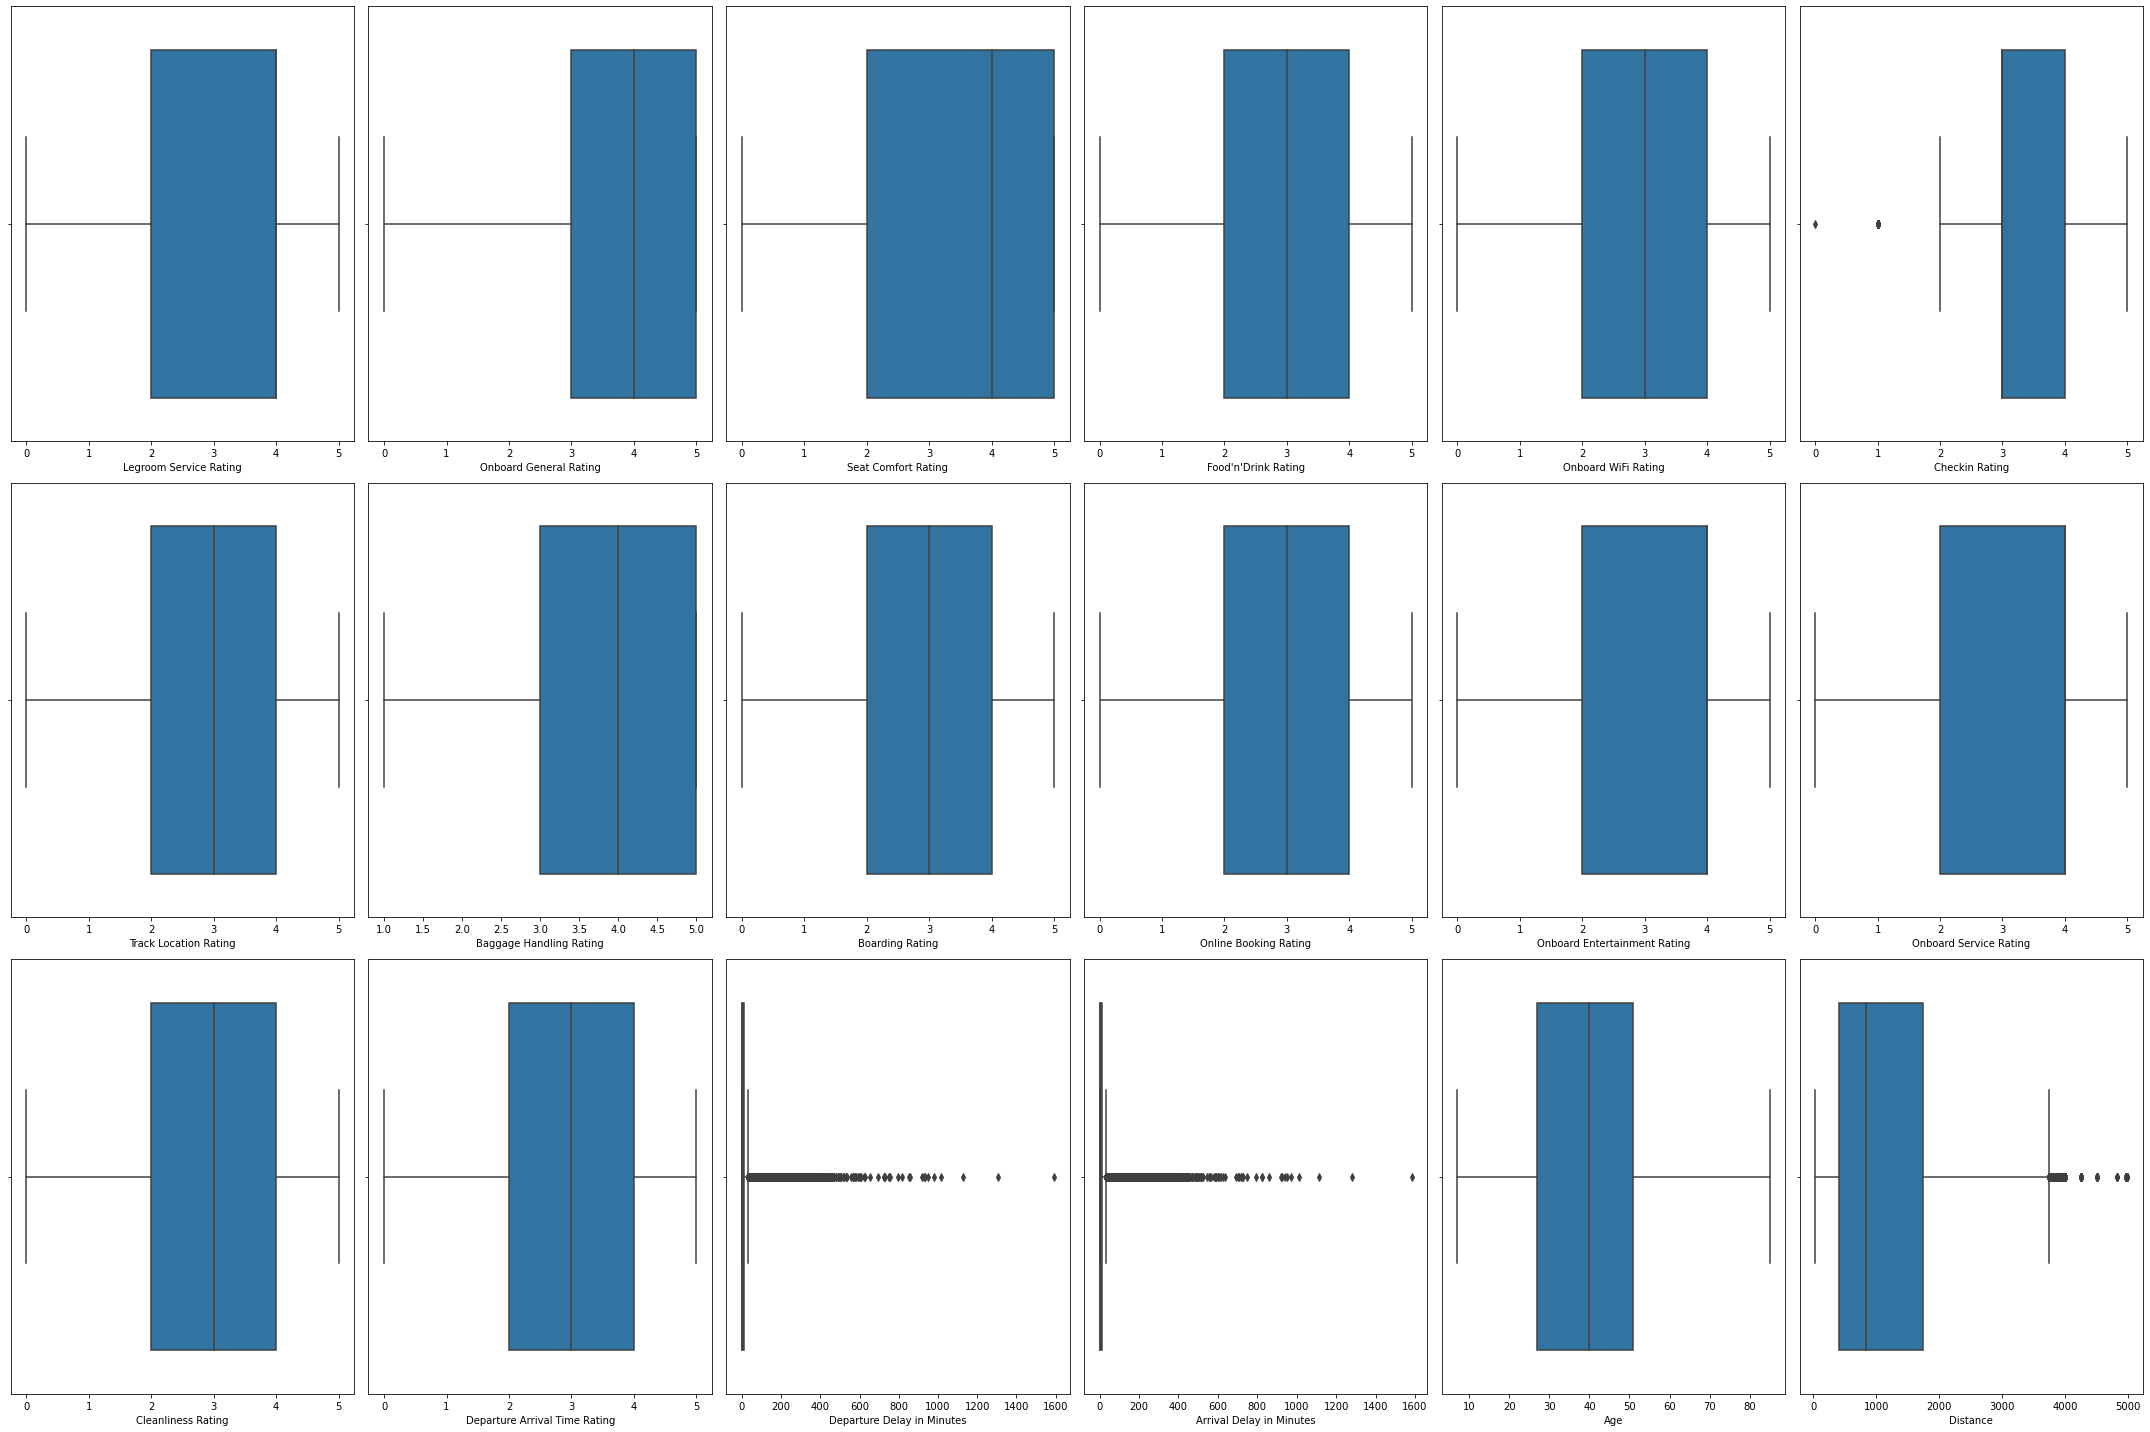

In [9]:
# Creating the boxplots
fig, axes = plt.subplots(3, 6, figsize=(30, 20))

sns.boxplot(ax=axes[0, 0], x=df_trains_filtered["Legroom Service Rating"])
sns.boxplot(ax=axes[0, 1], x=df_trains_filtered["Onboard General Rating"])
sns.boxplot(ax=axes[0, 2], x=df_trains_filtered["Seat Comfort Rating"])
sns.boxplot(ax=axes[0, 3], x=df_trains_filtered["Food'n'Drink Rating"])
sns.boxplot(ax=axes[0, 4], x=df_trains_filtered["Onboard WiFi Rating"])
sns.boxplot(ax=axes[0, 5], x=df_trains_filtered["Checkin Rating"])
sns.boxplot(ax=axes[1, 0], x=df_trains_filtered["Track Location Rating"])
sns.boxplot(ax=axes[1, 1], x=df_trains_filtered["Baggage Handling Rating"])
sns.boxplot(ax=axes[1, 2], x=df_trains_filtered["Boarding Rating"])
sns.boxplot(ax=axes[1, 3], x=df_trains_filtered["Online Booking Rating"])
sns.boxplot(ax=axes[1, 4], x=df_trains_filtered["Onboard Entertainment Rating"])
sns.boxplot(ax=axes[1, 5], x=df_trains_filtered["Onboard Service Rating"])
sns.boxplot(ax=axes[2, 0], x=df_trains_filtered["Cleanliness Rating"])
sns.boxplot(ax=axes[2, 1], x=df_trains_filtered["Departure Arrival Time Rating"])
sns.boxplot(ax=axes[2, 2], x=df_trains_filtered["Departure Delay in Minutes"])
sns.boxplot(ax=axes[2, 3], x=df_trains_filtered["Arrival Delay in Minutes"])
sns.boxplot(ax=axes[2, 4], x=df_trains_filtered["Age"])
sns.boxplot(ax=axes[2, 5], x=df_trains_filtered["Distance"])


plt.tight_layout()



Not all the variables have outliers. Here are the only ones collecting them:

- Checkin Rating
- Departure Delay in Minutes
- Arrival Delay in Minutes
- Distance

In our data set outliers represent rare but important cases that are relevant to predicting the target variable (customer satisfaction). Indeed, they could provide valuable information for our model (for example, extreme delays might be rare but are likely very impactful on customer satisfaction, and so their predictive power could be significant).

For these reasons, we decided not to remove them.



### Exploratory Data Analysis for Feature Understanding

#### Data Splitting

Select and separately store Numerical and Categorical features in different variables.

In [10]:
##Selecting numerical features
numerical_data = df_trains_filtered.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

#Selecting categoricalfeatures
categorical_data=df_trains_filtered.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)
print('\n')
print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 18 numerical features: 

['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


There are 5 numerical features: 

['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Work or Leisure']


#### Descriptive Statistics: summary of numerical variables

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [11]:
df_trains_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Legroom Service Rating,129880.0,3.350878,1.316252,0.0,2.0,4.0,4.0,5.0
Onboard General Rating,129880.0,3.642193,1.176669,0.0,3.0,4.0,5.0,5.0
Food'n'Drink Rating,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Departure Arrival Time Rating,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Onboard WiFi Rating,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Checkin Rating,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Track Location Rating,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Baggage Handling Rating,129880.0,3.632114,1.180025,1.0,3.0,4.0,5.0,5.0
Arrival Delay in Minutes,129880.0,15.045465,38.416353,0.0,0.0,0.0,13.0,1584.0


brief interpretation of the results:

Legroom Service Rating, Onboard General Rating, Food'n'Drink Rating, and similar service-related ratings:
        These ratings have a count of 129,880 entries, meaning there are no missing values.
        The mean rating is around 3 to 4 on a scale, suggesting moderately high satisfaction in general.
        The standard deviation (std) is around 1.3, indicating some variability in customer ratings but not extremely wide-ranging.
        The minimum (min) is 0, and the maximum (max) is 5, which is likely the range of the rating scale.
        The 25th, 50th (median), and 75th percentiles show that at least 50% of customers gave a rating of 3 or higher for these services.

Age:
        The average age of the customers is approximately 39 years old.
        The standard deviation is about 15 years, which suggests a broad age range of customers.
        The youngest customer is 7 years old, and the oldest is 85.


Arrival Delay in Minutes and Departure Delay in Minutes:
        The average delays are around 15 and 14 minutes, respectively, with a large standard deviation, indicating some trips have much higher delays.
        The maximum delay recorded is quite high (1584 minutes), suggesting occasional significant delays (outliers).

Distance:
        The distances traveled vary significantly, with the mean distance being around 1190 kilometers and the standard deviation around 997, indicating that the distance covered by customers varies greatly.

Overall, the service ratings are generally positive, customer ages vary widely, and there are some notable delays in departures and arrivals. The describe() function output provides a quick way to evaluate many aspects of data distribution, which can be crucial for data preprocessing and feature engineering in machine learning.

#### Descriptive Statistics: summary of categorical variables

In [12]:
categorical_data.describe(include='object').T

,count,unique,top,freq
Ticket Class,129880,3,Premium,62160
Loyalty,129880,2,Loyal,106100
Gender,129880,2,F,65899
Satisfied,129880,2,N,73452
Work or Leisure,129880,2,work,89693


Comments

#### Univariate Analysis: numerical variables

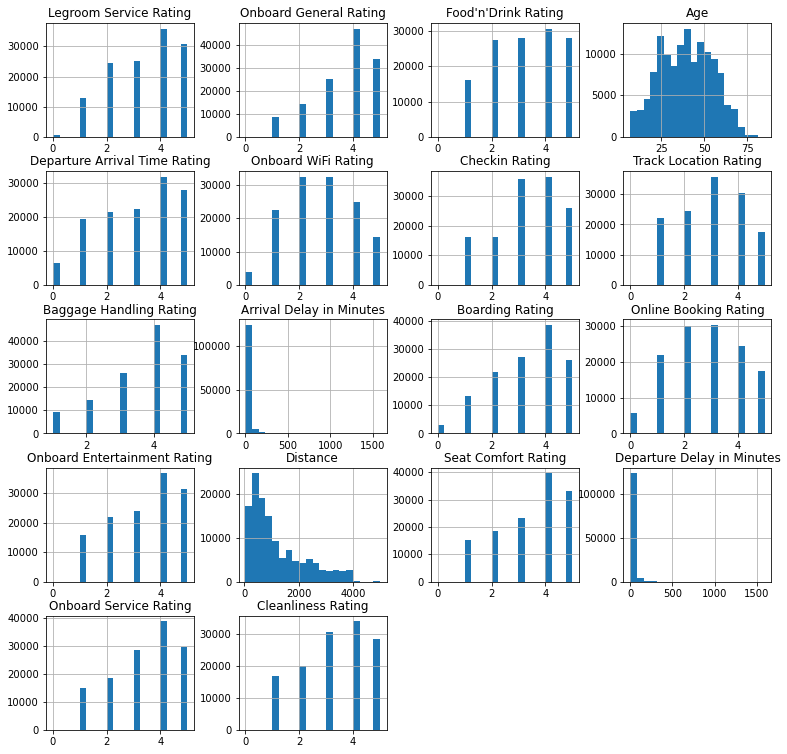

In [13]:
numerical_data.hist(figsize=(13,13),bins=20)
plt.show()

Observations from Feature Distributions

The initial EDA revealed that customer ratings for onboard services generally skewed high, indicating overall customer satisfaction with the ThomasTrain company's services. In contrast, features like 'Food'n'Drink Rating', 'Seat Comfort Rating', and 'Legroom Service Rating' displayed more diverse customer opinions.

Delays and Distance Insights

Both 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' showed a preponderance of short delays, with occasional longer delays that could significantly impact customer satisfaction. The distribution of 'Distance' suggested that most travels were short, but with enough long-distance trips to merit separate consideration for their impact on satisfaction levels.

#### Univariate Analysis: categorical variables

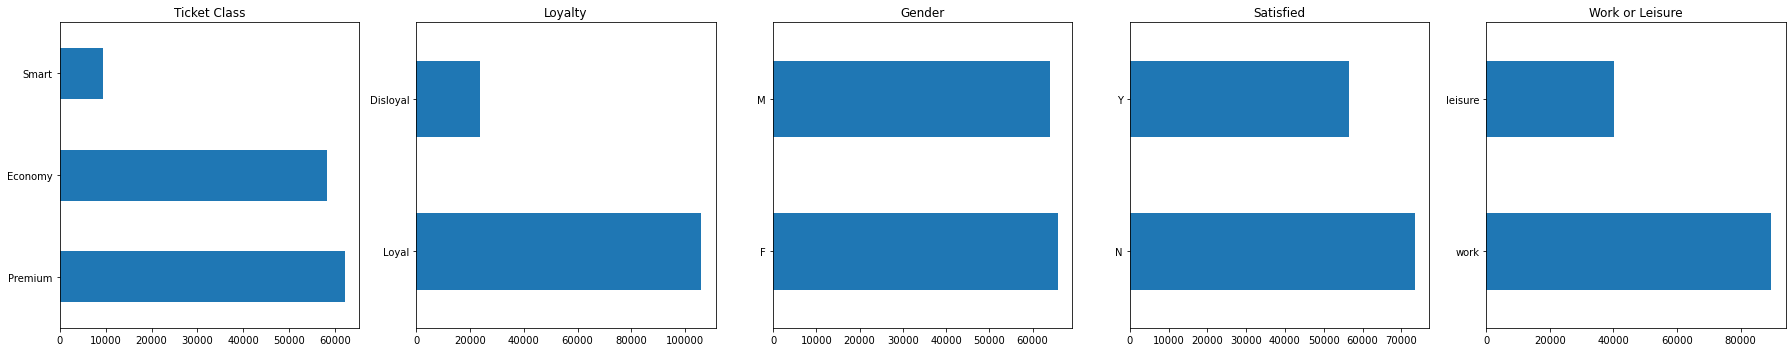

In [14]:
# Determine the number of categorical features
num_features = len(categorical_features)

# Create a figure with subplots in one row
fig, axes = plt.subplots(1, num_features, figsize=(num_features * 5, 5))  # Adjust figure size as needed

# Loop through each categorical feature and create a horizontal bar plot
for i, col in enumerate(categorical_features):
    categorical_data[col].value_counts().plot(kind='barh', ax=axes[i], title=col)

plt.tight_layout()
plt.show()

- Regarding ticket classes, the 'Premium' (62160/129880 = 47%) and 'Economy' are the most choosen, while 'smart' represents a much smaller group;
- Regarding Loyalty people who are "Loyal" are 106100/129880 = 80% of the total
- Regarding Gender they are almost equals
- Regarding Satisfaction, people that are not satisfied represent the 73452/129880 = 56% of the total
- Regarding the reason of the travel, the majority is for work (89693/129880 = 69% of the total)

#### Correlation analysis: correlation between numerical variables

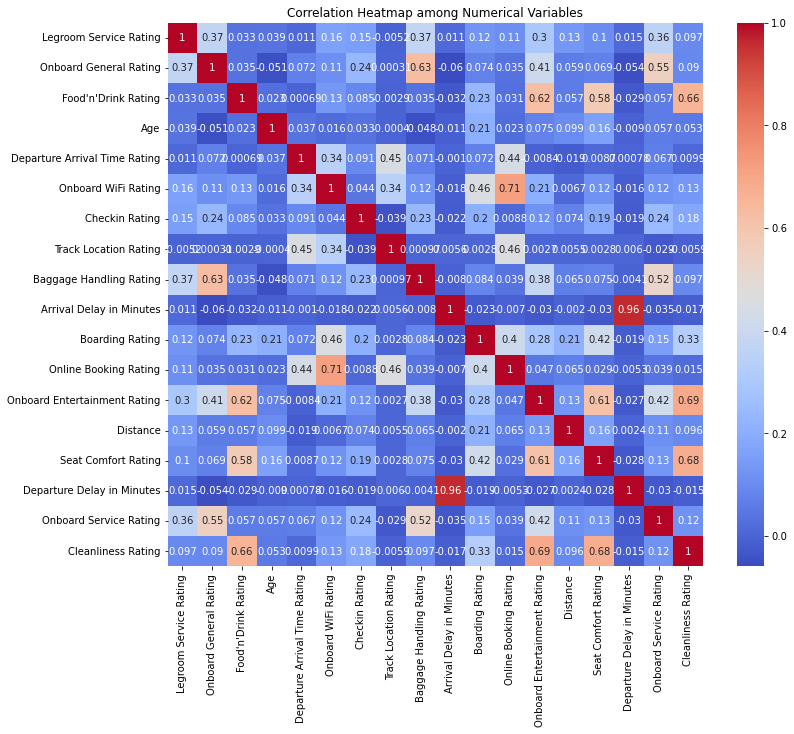

In [15]:
# Correlation among numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(df_trains_filtered[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap among Numerical Variables')
plt.show()


#### Correlation analysis: numerical variables & the target

In [16]:
# Convert 'Satisfied' to a numerical format for correlation analysis
df_trains_filtered['Satisfied_Num'] = df_trains_filtered['Satisfied'].apply(lambda x: 1 if x == 'Y' else 0)

for col in numerical_features:
    corr, _ = pointbiserialr(df_trains_filtered[col], df_trains_filtered['Satisfied_Num'])
    print(f'Correlation between {col} and Satisfied: {corr}')

Correlation between Legroom Service Rating and Satisfied: 0.3124238194944644
Correlation between Onboard General Rating and Satisfied: 0.244917835745692
Correlation between Food'n'Drink Rating and Satisfied: 0.21134020762506026
Correlation between Age and Satisfied: 0.13409123867754663
Correlation between Departure Arrival Time Rating and Satisfied: -0.05426971049373698
Correlation between Onboard WiFi Rating and Satisfied: 0.28346023010122745
Correlation between Checkin Rating and Satisfied: 0.23725236030898372
Correlation between Track Location Rating and Satisfied: -0.002793274652470942
Correlation between Baggage Handling Rating and Satisfied: 0.24867991877512483
Correlation between Arrival Delay in Minutes and Satisfied: -0.05814493658832044
Correlation between Boarding Rating and Satisfied: 0.5017494207376278
Correlation between Online Booking Rating and Satisfied: 0.1688771390528441
Correlation between Onboard Entertainment Rating and Satisfied: 0.3982336506118982
Correlation be

Among numerical variables, "Boarding Rating" and "Onboard Entertainment Rating" show the strongest positive correlations with satisfaction, while delays (both arrival and departure) have a negative correlation with satisfaction.

#### Correlation analysis: categorical variables & the target

In [17]:
# Function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


# Correlation among categorical variables and with the target variable
for col in categorical_features:
    if col != 'Satisfied':
        result = cramers_v(df_trains_filtered[col], df_trains_filtered['Satisfied'])
        print(f"Cramér's V between {col} and Satisfied: {result}")

Cramér's V between Ticket Class and Satisfied: 0.5033470652376267
Cramér's V between Loyalty and Satisfied: 0.18599710903940497
Cramér's V between Gender and Satisfied: 0.01122058165604724
Cramér's V between Work or Leisure and Satisfied: 0.44984445343575097


Among categorical variables, "Ticket Class" and "Work or Leisure" have stronger associations with satisfaction.

### Feature Selection

Select features that are most likely to predict customer satisfaction effectively

In [18]:
# Calculating correlations and filtering based on the threshold
correlation_threshold = 0.02
selected_features = []

# Feature Selection for Numerical Features
numerical_cols = df_trains_filtered.select_dtypes(include=['int64', 'float64']).columns
selected_numerical = [col for col in numerical_cols if abs(pointbiserialr(df_trains_filtered[col], df_trains_filtered['Satisfied_Num']).correlation) > correlation_threshold]

# Feature Selection for Categorical Features
categorical_cols = df_trains_filtered.select_dtypes(include=['object']).columns
selected_categorical = [col for col in categorical_features if col != 'Satisfied' and
                        cramers_v(df_trains_filtered[col], df_trains_filtered['Satisfied']) > correlation_threshold]

# Combine selected features
selected_features = selected_numerical + selected_categorical

df_trains_after_selection = df_trains_filtered[selected_features]


We also decided to drop the variable 'Departure Delay in Minutes' which is strongly correlated with 'Arrival Delay in Minutes' as shown in the previous HeatMap.

In [19]:
final_df_trains = df_trains_after_selection.drop('Departure Delay in Minutes', axis=1)



### Preparing Data for Modeling

#### Encoding Categorical Variables

Convert categorical variables to a format suitable for modeling

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Select categorical variables
new_categorical_cols = final_df_trains.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame for the encoded columns
encoded_df = pd.DataFrame()

# Loop through each categorical column
for col in new_categorical_cols:
    if final_df_trains[col].nunique() >= 3:
        # Apply Label Encoding for variables with 3 or more unique values
        le = LabelEncoder()
        encoded_df[col+'_encoded'] = le.fit_transform(final_df_trains[col])
    else:
        # Apply One-Hot Encoding for binary variables
        encoder = OneHotEncoder( drop='first')  # Optionally, use drop='first' to avoid multicollinearity
        encoded_col = encoder.fit_transform(final_df_trains[[col]])
        encoded_col_df = pd.DataFrame(encoded_col, columns=[col+'_encoded'])
        encoded_df = pd.concat([encoded_df, encoded_col_df], axis=1)

# Concatenate encoded columns with the original DataFrame and drop original categorical columns
df_trains_encoded = pd.concat([final_df_trains, encoded_df], axis=1).drop(new_categorical_cols, axis=1)




#### Feature Scaling

Standardize or normalize numerical features

In [24]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling, excluding 'Satisfied_Num'
new_numerical_cols = df_trains_encoded.select_dtypes(include=['int64', 'float64']).columns
new_numerical_cols = new_numerical_cols.drop('Satisfied_Num')  # Exclude 'Satisfied_Num'

# Create a copy of the DataFrame
df_trains_after_scaling = df_trains_encoded.copy()

# Apply StandardScaler only to the selected numerical features
scaler = StandardScaler()
df_trains_after_scaling[new_numerical_cols] = scaler.fit_transform(df_trains_after_scaling[new_numerical_cols])



Since we decided not to handle outliers, StandardScaler is less sensitive to them compared to MinMaxScaler.

#### Data Splitting

Split the dataset into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split

# Assuming 'Satisfied_Num' is your target variable
X = df_trains_after_scaling.drop('Satisfied_Num', axis=1)
y = df_trains_after_scaling['Satisfied_Num']

# Split the data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (97410, 19)
X_test shape: (32470, 19)


### Model Building

#### Creating a Validation Set

In [26]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


#### Testing Different Models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Initialize models with default hyperparameters
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()


# Train each model and evaluate on both the training set and validation set
for model in [log_reg, dt_clf, rf_clf]:
    model.fit(X_train_new, y_train_new)

    # Calculate accuracy on the training set
    train_score = model.score(X_train_new, y_train_new)

    # Calculate accuracy on the validation set
    val_score = model.score(X_val, y_val)

    # Print accuracy for both training and validation sets
    print(f'{model.__class__.__name__} training accuracy: {train_score}')
    print(f'{model.__class__.__name__} validation accuracy: {val_score}')



ValueError: setting an array element with a sequence.

#### Hyperparameter Tuning Using Cross-Validation

#### Randomized Search for Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Parameter distribution
param_distr_log_reg = {'C': uniform(0.1, 100), 'solver': ['lbfgs', 'liblinear']}

# Randomized search with cross-validation
random_log_reg = RandomizedSearchCV(LogisticRegression(), param_distr_log_reg, n_iter=10, cv=5, random_state=42, n_jobs=-1, return_train_score=True)
random_log_reg.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score = random_log_reg.cv_results_['mean_train_score'][random_log_reg.best_index_]
std_train_score = random_log_reg.cv_results_['std_train_score'][random_log_reg.best_index_]
mean_test_score = random_log_reg.cv_results_['mean_test_score'][random_log_reg.best_index_]
std_test_score = random_log_reg.cv_results_['std_test_score'][random_log_reg.best_index_]

# Print the results
print("Best parameters for Logistic Regression:", random_log_reg.best_params_)
print("Best training score for Logistic Regression:", mean_train_score)
print("Standard deviation in training score:", std_train_score)
print("Best cross-validation score for Logistic Regression:", mean_test_score)
print("Standard deviation in cross-validation score:", std_test_score)

Best parameters for Logistic Regression: {'C': 37.55401188473625, 'solver': 'lbfgs'}
Best training score for Logistic Regression: 0.8726491120008213
Standard deviation in training score: 0.00026934505177998274
Best cross-validation score for Logistic Regression: 0.8725387537213838
Standard deviation in cross-validation score: 0.001314434416808894


#### Randomized Search for Decision Tree

In [ ]:
from scipy.stats import randint

# Parameter distribution for Decision Tree
param_distr_dt = {'max_depth': randint(1, 30), 'min_samples_split': randint(2, 20), 'min_samples_leaf': randint(1, 20)}

# Randomized search with cross-validation
random_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distr_dt, n_iter=10, cv=5, random_state=42, n_jobs=-1, return_train_score=True)
random_dt.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score_dt = random_dt.cv_results_['mean_train_score'][random_dt.best_index_]
std_train_score_dt = random_dt.cv_results_['std_train_score'][random_dt.best_index_]
mean_test_score_dt = random_dt.cv_results_['mean_test_score'][random_dt.best_index_]
std_test_score_dt = random_dt.cv_results_['std_test_score'][random_dt.best_index_]

# Print the results
print("Best parameters for Decision Tree:", random_dt.best_params_)
print("Best training score for Decision Tree:", mean_train_score_dt)
print("Standard deviation in training score:", std_train_score_dt)
print("Best cross-validation score for Decision Tree:", mean_test_score_dt)
print("Standard deviation in cross-validation score:", std_test_score_dt)


Best parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 13}
Best training score for Decision Tree: 0.9593034596037366
Standard deviation in training score: 0.0005085630423068337
Best cross-validation score for Decision Tree: 0.9495944974848578
Standard deviation in cross-validation score: 0.0016787157231116616


#### Randomized Search for Random Forest

In [ ]:
from scipy.stats import randint

# Parameter distribution
param_distr_rf = {'n_estimators': randint(100, 300), 'max_features': ['sqrt', 'log2'], 'max_depth': randint(10, 30)}

# Randomized search with cross-validation
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_distr_rf, n_iter=10, cv=5, random_state=42, n_jobs=-1, return_train_score=True)
random_rf.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score_rf = random_rf.cv_results_['mean_train_score'][random_rf.best_index_]
std_train_score_rf = random_rf.cv_results_['std_train_score'][random_rf.best_index_]
mean_test_score_rf = random_rf.cv_results_['mean_test_score'][random_rf.best_index_]
std_test_score_rf = random_rf.cv_results_['std_test_score'][random_rf.best_index_]

# Print the results
print("Best parameters for RandomForest:", random_rf.best_params_)
print("Best training score for RandomForest:", mean_train_score_rf)
print("Standard deviation in training score:", std_train_score_rf)
print("Best cross-validation score for RandomForest:", mean_test_score_rf)
print("Standard deviation in cross-validation score:", std_test_score_rf)

Best parameters for RandomForest: {'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 171}
Best training score for RandomForest: 0.9988656195462478
Standard deviation in training score: 8.650189686043495e-05
Best cross-validation score for RandomForest: 0.9621086130787393
Standard deviation in cross-validation score: 0.0010435918655456553


### Plotting Learning Curves

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and n_features is the number of features.
    y : array-like, shape (n_samples)
        Target relative to X for classification or regression.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to generate the learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#### Learning Curves: Logistic Regression

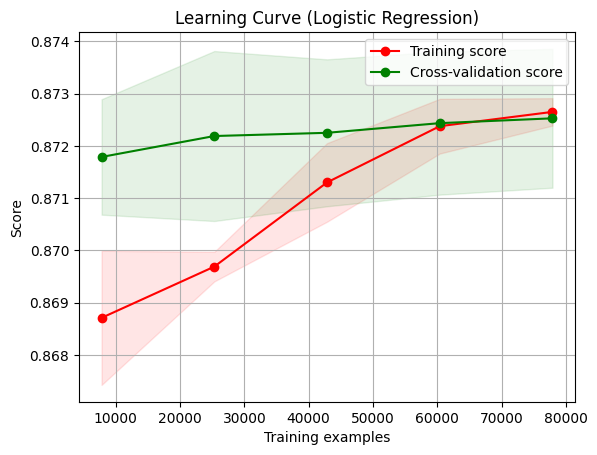

In [ ]:
plot_learning_curve(LogisticRegression(), "Learning Curve (Logistic Regression)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

#### Learning Curves: Decision Tree

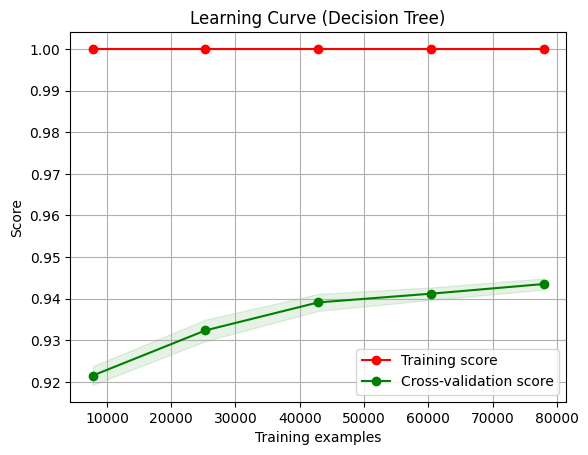

In [ ]:
plot_learning_curve(DecisionTreeClassifier(), "Learning Curve (Decision Tree)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

#### Learning Curves: Random Forest

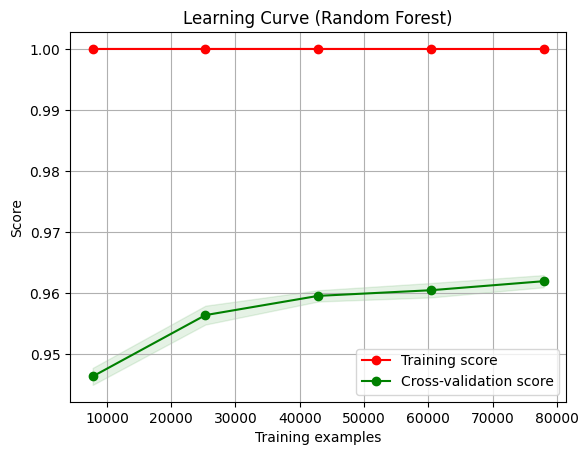

In [ ]:
plot_learning_curve(RandomForestClassifier(), "Learning Curve (Random Forest)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

### Models Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

# Best estimators from RandomizedSearchCV
best_log_reg = random_log_reg.best_estimator_
best_decision_tree = random_dt.best_estimator_
best_random_forest = random_rf.best_estimator_

# Make predictions on the test set
log_reg_pred = best_log_reg.predict(X_test)
decision_tree_pred = best_decision_tree.predict(X_test)
random_forest_pred = best_random_forest.predict(X_test)

# Detailed metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_pred))






Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     18347
           1       0.87      0.83      0.85     14123

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     18347
           1       0.96      0.93      0.94     14123

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     18347
           1       0.98      0.94      0.96     14123

    accuracy                           0.96     32470
   macro

#### Confusion Matrices

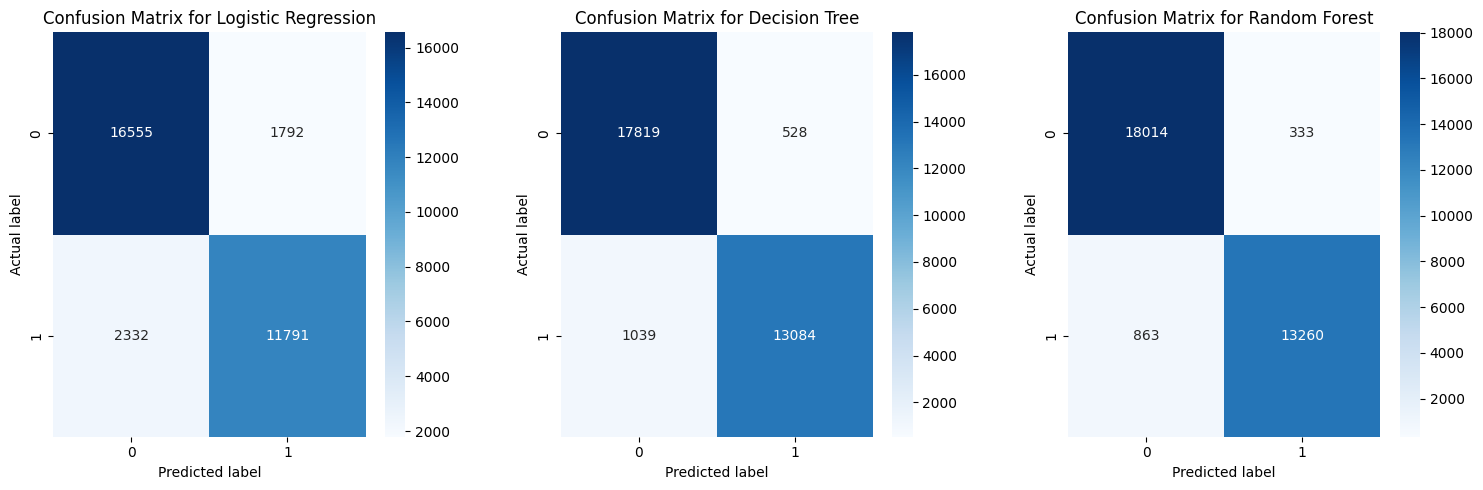

In [ ]:
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(nrows=1, ncols=len(y_preds), figsize=(15, 5))

    for ax, y_pred, model_name in zip(axes, y_preds, model_names):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix for {model_name}')
        ax.set_ylabel('Actual label')
        ax.set_xlabel('Predicted label')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Create a list of predictions and model names
predictions = [log_reg_pred, decision_tree_pred, random_forest_pred]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Call the function with the test labels, predictions, and model names
plot_confusion_matrix(y_test, predictions, model_names)

#### ROC Curves

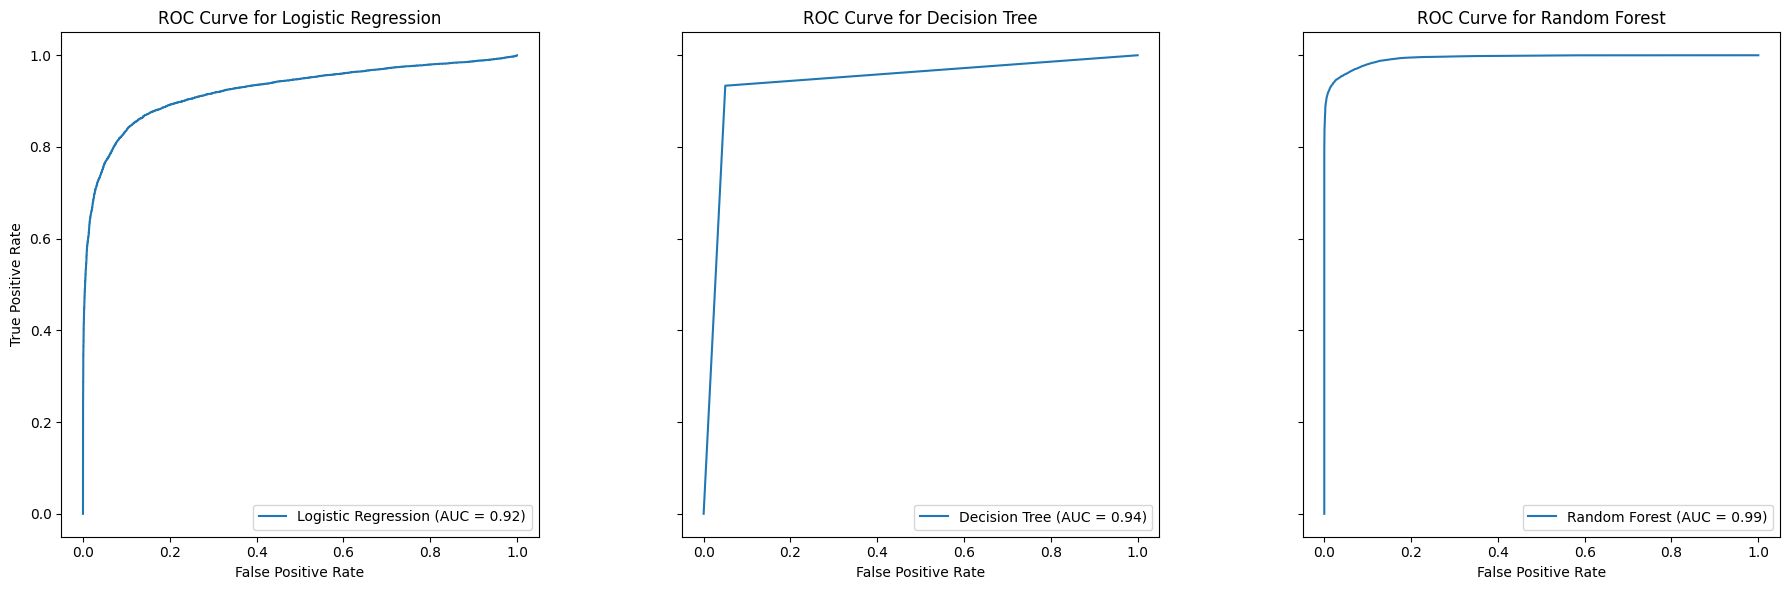

In [ ]:
def plot_roc_curves_and_get_auc(models, X_test, y_test, model_names):
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(18, 6))
    auc_scores = {}

    for ax, model, model_name in zip(axes, models, model_names):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        auc_scores[model_name] = roc_auc  # Store the AUC score

        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name).plot(ax=ax)
        ax.set_title(f'ROC Curve for {model_name}')
        ax.label_outer()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)  # Adjust the width of the space between subplots
    plt.show()

    return auc_scores

# Create a list of models and model names
models = [log_reg, dt_clf, rf_clf]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Call the function with the test data and models, and get AUC scores
auc_scores = plot_roc_curves_and_get_auc(models, X_test, y_test, model_names)


#### Models Comparison

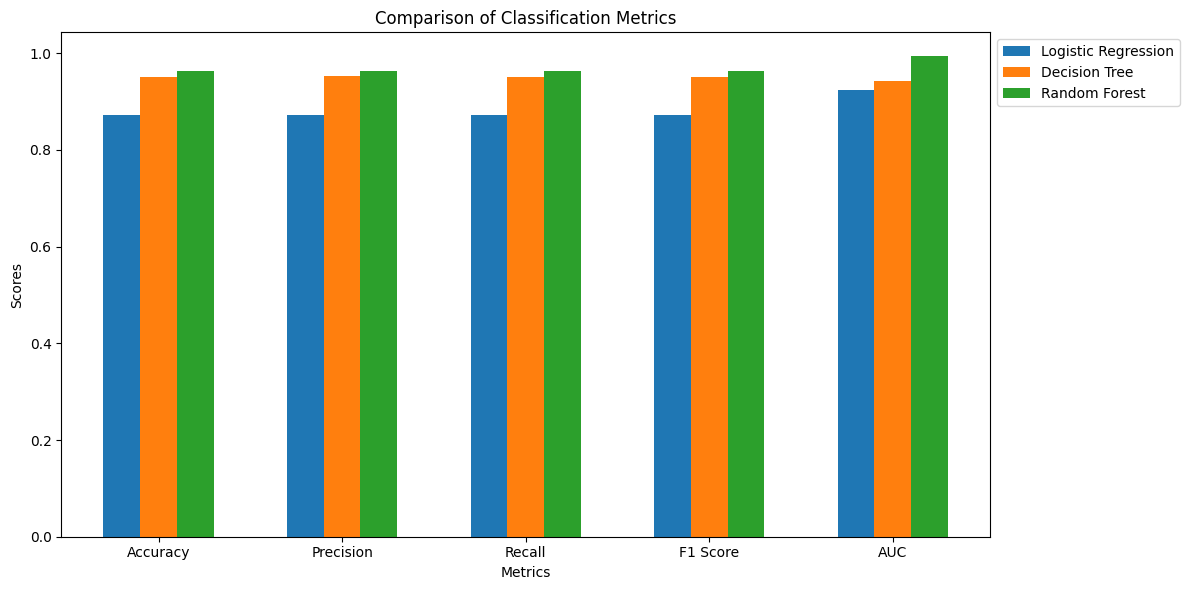

In [ ]:
from sklearn.metrics import classification_report

# Detailed metrics as dictionaries
report_log_reg = classification_report(y_test, log_reg_pred, output_dict=True)
report_decision_tree = classification_report(y_test, decision_tree_pred, output_dict=True)
report_random_forest = classification_report(y_test, random_forest_pred, output_dict=True)

# Extracting accuracy, precision, recall, and f1-score for each model
accuracy_log_reg = report_log_reg['accuracy']
precision_log_reg = report_log_reg['weighted avg']['precision']
recall_log_reg = report_log_reg['weighted avg']['recall']
f1_log_reg = report_log_reg['weighted avg']['f1-score']

accuracy_dt = report_decision_tree['accuracy']
precision_dt = report_decision_tree['weighted avg']['precision']
recall_dt = report_decision_tree['weighted avg']['recall']
f1_dt = report_decision_tree['weighted avg']['f1-score']

accuracy_rf = report_random_forest['accuracy']
precision_rf = report_random_forest['weighted avg']['precision']
recall_rf = report_random_forest['weighted avg']['recall']
f1_rf = report_random_forest['weighted avg']['f1-score']

# For AUC, we have stored them previously during ROC curve plotting
auc_log_reg = auc_scores["Logistic Regression"]
auc_dt = auc_scores["Decision Tree"]
auc_rf = auc_scores["Random Forest"]


# Metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
log_reg_values = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg, auc_log_reg]
decision_tree_values = [accuracy_dt, precision_dt, recall_dt, f1_dt, auc_dt]
random_forest_values = [accuracy_rf, precision_rf, recall_rf, f1_rf, auc_rf]

# Setting the positions and width for the bars
pos = np.arange(len(metrics))
bar_width = 0.2

# Plotting the bars
plt.figure(figsize=(12, 6))

plt.bar(pos, log_reg_values, bar_width, label='Logistic Regression')
plt.bar(pos + bar_width, decision_tree_values, bar_width, label='Decision Tree')
plt.bar(pos + bar_width * 2, random_forest_values, bar_width, label='Random Forest')

plt.xticks(pos + bar_width, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
